In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
import numpy as np
from lyft_dataset_sdk.lyftdataset import LyftDataset
import matplotlib.pyplot as plt
from prepare_lyft_data import parse_train_csv,get_pc_in_image_fov,level5data

In [70]:
import pickle

In [71]:
pred_file="/Users/kanhua/Dropbox/Programming/lyft-3d-main/train_val_pred.csv"
pred_obj=parse_train_csv(pred_file,with_score=True)

100%|██████████| 1210/1210 [00:00<00:00, 32909.94it/s]


In [171]:
data_idx=105

In [172]:
from skimage.io import imread

In [173]:
## Load prediction

In [174]:
pred_obj.iloc[data_idx,:]

sample_id     e8fa70c08e241d8a52a52da3a0c466bb37815dc9212804...
object_id                                                     4
center_x                                                1615.61
center_y                                                1356.08
center_z                                               -20.1378
width                                                   1.73503
length                                                  4.26263
height                                                  1.69655
yaw                                           2.626413591789186
class_name                                                  car
Name: 105, dtype: object

In [175]:
sample_token=pred_obj['sample_id'][data_idx]
print(sample_token)

e8fa70c08e241d8a52a52da3a0c466bb37815dc92128041598660a174db29c2d


In [176]:
sample_record=level5data.get("sample",sample_token)

In [177]:
lidar_top_token=sample_record['data']['LIDAR_TOP']
lidar_path=level5data.get_sample_data_path(lidar_top_token)

In [178]:
from lyft_dataset_sdk.utils.data_classes import LidarPointCloud

In [179]:
lpc=LidarPointCloud.from_file(lidar_path)

In [180]:
from prepare_lyft_data import transform_box_from_world_to_sensor_coordinates,get_train_data_sample_token_and_box

In [181]:
_,box=get_train_data_sample_token_and_box(data_idx,pred_obj)

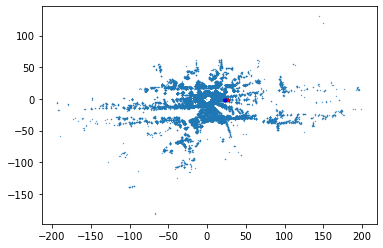

In [182]:
box_in_lidar_coord=transform_box_from_world_to_sensor_coordinates(box,lidar_top_token,level5data)
fig,ax=plt.subplots()
pts=lpc.points
ax.scatter(pts[0,:],pts[1,:],s=0.1)
#ax.set_xlim([-30,-20])
#ax.set_ylim([-20,10])
view_mtx=np.eye(2)
box_in_lidar_coord.render(ax,view=view_mtx)

In [183]:
camera_token=sample_record['data']['CAM_FRONT']

In [184]:
box_in_camera_coord=transform_box_from_world_to_sensor_coordinates(box,camera_token,level5data)

In [185]:
camera_image_path,_,cam_intrinsic=level5data.get_sample_data(camera_token)

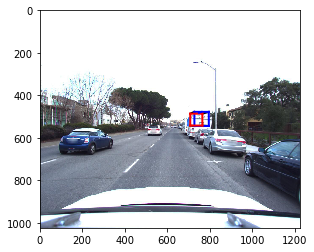

In [186]:
image_array=imread(camera_image_path)
fig,ax=plt.subplots()
ax.imshow(image_array)
box_in_camera_coord.render(ax,view=cam_intrinsic,normalize=True)

## Show ground truth data

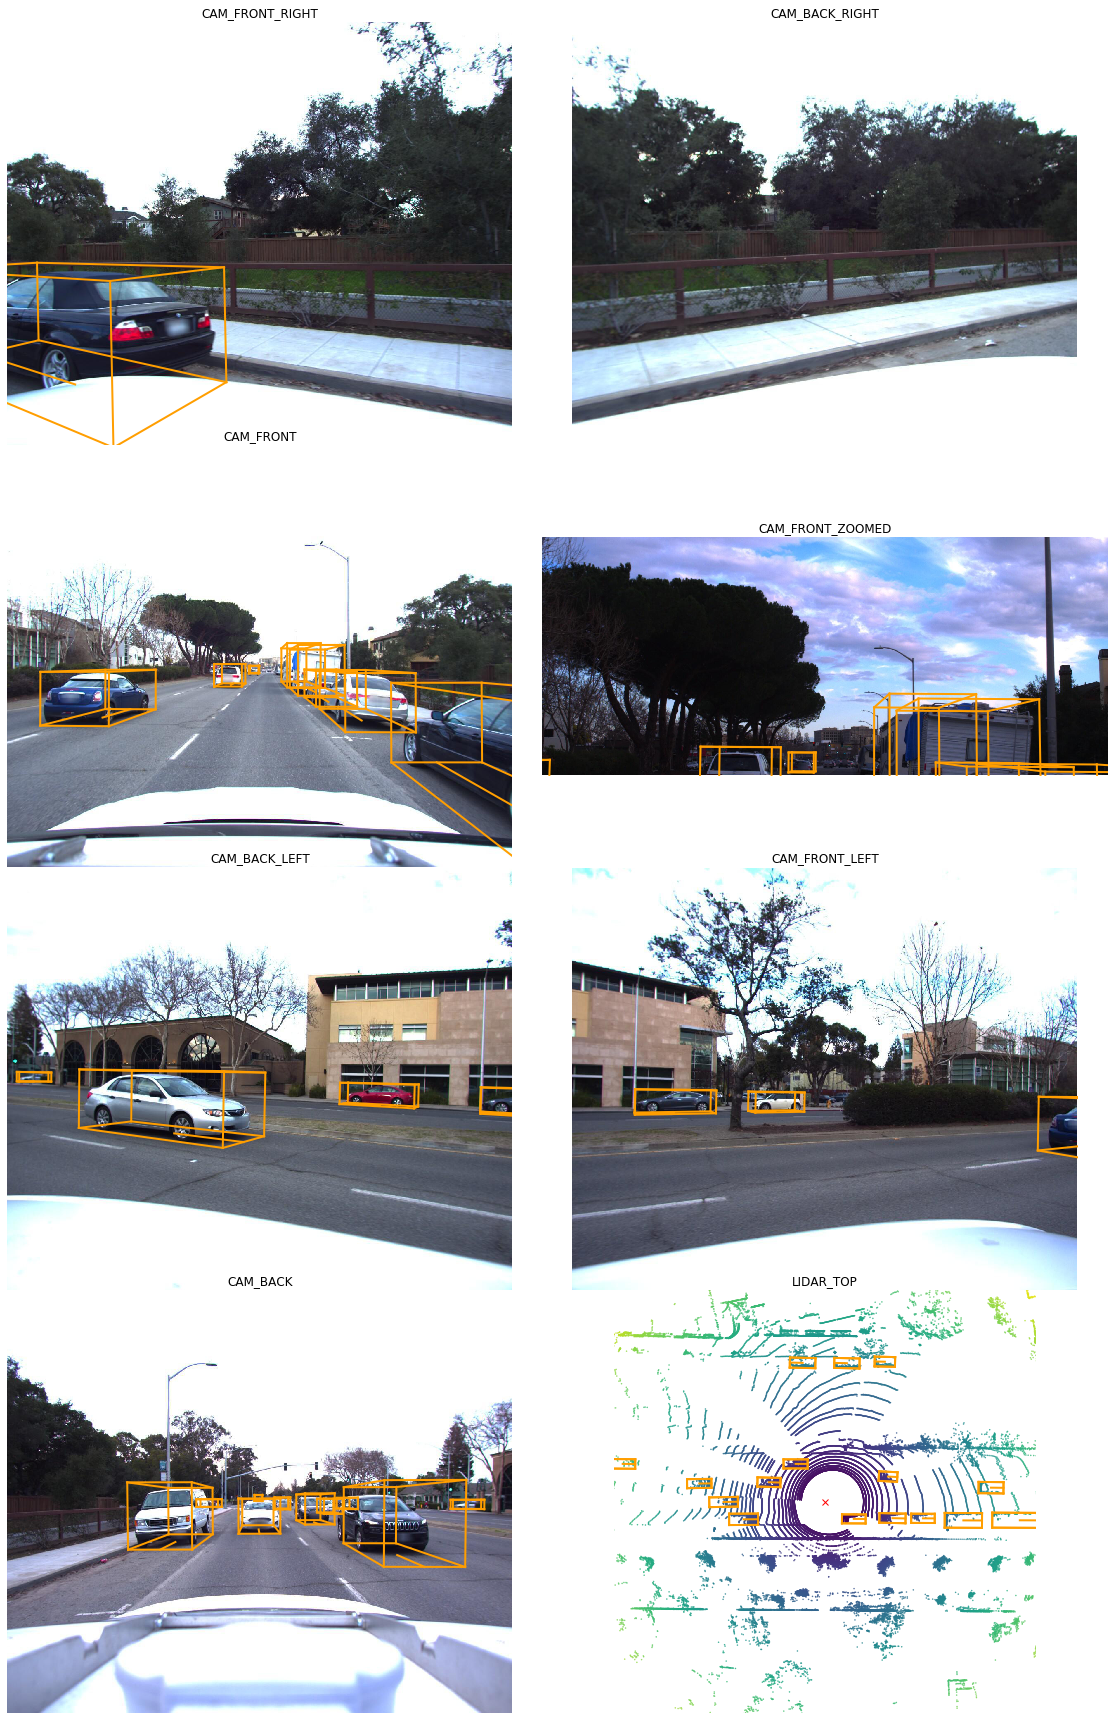

In [193]:
level5data.render_sample(sample_token=sample_token)

In [187]:
pred_obj.iloc[15,:]

sample_id     efbfe8df6fbf8afda5f394cc9667b8755ed8c461ea7fd3...
object_id                                                     0
center_x                                                1652.42
center_y                                                 1334.9
center_z                                               -19.9548
width                                                   1.71736
length                                                  4.23603
height                                                  1.78175
yaw                                           2.629096425146723
class_name                                                  car
Name: 15, dtype: object

In [188]:
pred_obj.iloc[14,:]

sample_id     94d336303651ec8066fc530b7020adbe5a5ded16de987b...
object_id                                                     4
center_x                                                1612.82
center_y                                                 1358.6
center_z                                               -20.3223
width                                                   1.81014
length                                                  4.24674
height                                                  1.79492
yaw                                           2.584797761741033
class_name                                                  car
Name: 14, dtype: object

In [189]:
pred_obj.iloc[17,:]

sample_id     efbfe8df6fbf8afda5f394cc9667b8755ed8c461ea7fd3...
object_id                                                     2
center_x                                                1609.89
center_y                                                1360.31
center_z                                               -20.3427
width                                                   1.84466
length                                                   4.2792
height                                                  1.78416
yaw                                          2.5898914135083615
class_name                                                  car
Name: 17, dtype: object

In [190]:
from object_classifier import TLClassifier
from vis_util import draw_bounding_boxes_on_image_array,draw_bounding_box_on_image_array

In [191]:
tlc=TLClassifier()

In [192]:
det_box=tlc.detect_multi_object(image_array,score_threshold=[0.6,0.6,0.6],rearrange_to_pointnet_convention=False)
det_box

array([[0.52924585, 0.41358143, 0.56899333, 0.46927214, 0.93900323,
        0.        ],
       [0.53947884, 0.07739273, 0.66769069, 0.28007764, 0.92716122,
        0.        ],
       [0.53980434, 0.55164546, 0.57126009, 0.57604247, 0.88516653,
        0.        ],
       [0.54020709, 0.5863319 , 0.59111243, 0.63378757, 0.88130271,
        0.        ],
       [0.58684438, 0.79114223, 0.84339815, 1.        , 0.76169634,
        0.        ]])

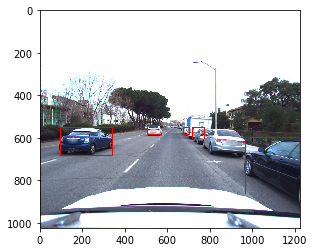

In [94]:
image_to_draw=np.copy(image_array)
det_box=det_box[:,0:4]
draw_bounding_boxes_on_image_array(image_to_draw,det_box)
plt.imshow(image_to_draw)

In [67]:
det_box=tlc.detect_multi_object(image_array,score_threshold=[0.6,0.6,0.6],rearrange_to_pointnet_convention=True)
mask, pc_3d, pc_2d, lpc, img=get_pc_in_image_fov(lidar_top_token,'CAM_FRONT',level5testdata,bounding_box=det_box[1,0:4])

NameError: name 'level5testdata' is not defined

In [ ]:
pc_2d.shape

In [ ]:
fig,ax=plt.subplots()
ax.imshow(img)
ax.scatter(pc_2d[0,:],pc_2d[1,:])

In [ ]:
image_array.shape